##DANIEL DABA DIEUMERCI ##Master 1 / MIAGE/ISIG-GOMA ##LE 16/07/2025

In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go


%matplotlib inline


with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df


,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [2]:
# ===== Construction du DataFrame final à partir des données étiquetées =====

dic = {"tag": [], "patterns": [], "responses": []}

for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]    
    rspns = df[df.index == i]['responses'].values[0]   
    tag = df[df.index == i]['tag'].values[0]           

    for j in range(len(ptrns)):                        
        dic['tag'].append(tag)                         
        dic['patterns'].append(ptrns[j])               
        dic['responses'].append(rspns)                 

df = pd.DataFrame.from_dict(dic)
df


,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


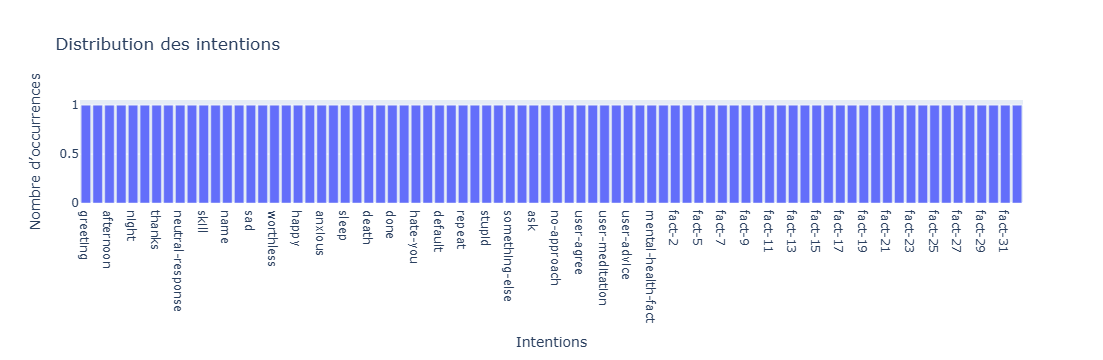

In [7]:
# ===== Visualisation en graphique de la distribution des intentions (tags) =====


# Compter le nombre d'occurrences de chaque tag
compte_intentions = df['tag'].value_counts()

# Création du graphique en barres
fig = go.Figure(data=[go.Bar(x=compte_intentions.index, y=compte_intentions.values)])

# Mise à jour des titres du graphique
fig.update_layout(
    title='Distribution des intentions',
    xaxis_title='Intentions',
    yaxis_title='Nombre d’occurrences'
)

# Affichage du graphique
fig.show()


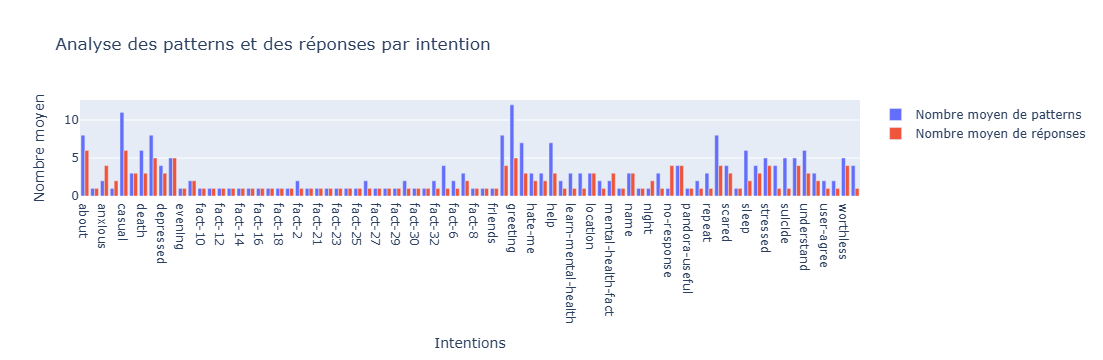

In [9]:
# ===== Analyse des modèles et des réponses par intention =====

# Calcul du nombre de patterns et de réponses par ligne
df['nombre_patterns'] = df['patterns'].apply(lambda x: len(x))
df['nombre_reponses'] = df['responses'].apply(lambda x: len(x))

# Calcul de la moyenne des patterns et des réponses par tag (intention)
moyenne_patterns = df.groupby('tag')['nombre_patterns'].mean()
moyenne_reponses = df.groupby('tag')['nombre_reponses'].mean()

# Création du graphique en barres
fig = go.Figure()
fig.add_trace(go.Bar(x=moyenne_patterns.index, y=moyenne_patterns.values, name='Nombre moyen de patterns'))
fig.add_trace(go.Bar(x=moyenne_reponses.index, y=moyenne_reponses.values, name='Nombre moyen de réponses'))

# Mise à jour des titres du graphique
fig.update_layout(
    title='Analyse des patterns et des réponses par intention',
    xaxis_title='Intentions',
    yaxis_title='Nombre moyen',
    barmode='group'
)

# Affichage du graphique
fig.show()
